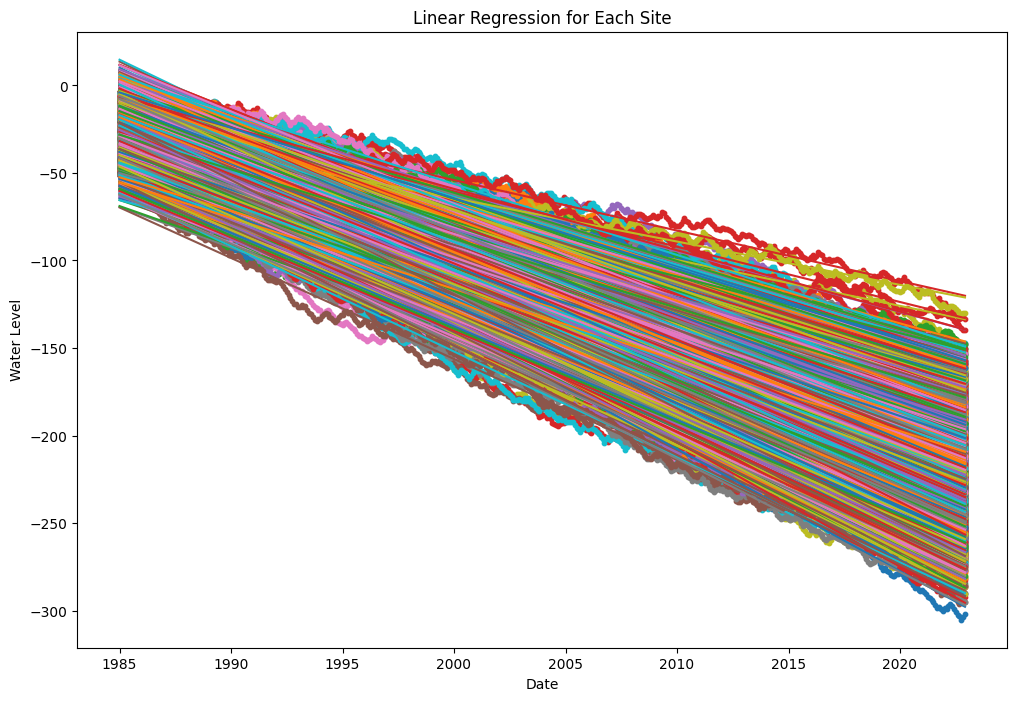

ValueError: time data "Site_1" doesn't match format "%d/%m/%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('groundwater_timeseries_data_Negative.csv', sep=',')

# Step 2: Data Preprocessing
df['date'] = pd.to_datetime(df['date'])

# Step 3: Check and convert the 'level' column to a numeric data type
df['level'] = pd.to_numeric(df['level'], errors='coerce')

# Step 4: Create a list to store the regression models
regression_models = []

# Step 5: Conduct Linear Regression for each site
sites = df['site'].unique()

for site in sites:
    site_data = df[df['site'] == site]
    X = sm.add_constant(site_data['date'].map(pd.Timestamp.toordinal))
    y = site_data['level']
    model = sm.OLS(y, X).fit()
    regression_models.append(model)

# Step 6: Plot all regression lines on one graph
plt.figure(figsize=(12, 8))

# Scatter plot of data points for each site
for site in sites:
    site_data = df[df['site'] == site]
    plt.scatter(site_data['date'], site_data['level'], label=site, s=10)

# Plot regression lines for each site
for i, model in enumerate(regression_models):
    site_data = df[df['site'] == sites[i]]
    plt.plot(site_data['date'], model.fittedvalues, label=f'{sites[i]} Regression Line')

plt.xlabel('Date')
plt.ylabel('Water Level')
plt.title('Linear Regression for Each Site')
# plt.legend()
# plt.tight_layout()
plt.show()

# Step 7: Create a new DataFrame to store the average level for each site
average_levels = []

for site in sites:
    site_data = df[df['site'] == site]
    average_level = site_data['level'].mean()
    average_levels.append({'site': site, 'average_level': average_level})

average_levels_df = pd.DataFrame(average_levels)

# Step 8: Perform Linear Regression for the average levels
X_avg = sm.add_constant(pd.to_datetime(average_levels_df['site'], format='%d/%m/%Y').map(pd.Timestamp.toordinal))
y_avg = average_levels_df['average_level']
model_avg = sm.OLS(y_avg, X_avg).fit()

# Step 9: Plot the regression line for average levels
plt.figure(figsize=(12, 8))
plt.scatter(df['date'], average_levels_df['average_level'], label='Average Levels', s=10)
plt.plot(df['date'], model_avg.fittedvalues, color='red', label='Average Levels Regression Line')
plt.xlabel('Date')
plt.ylabel('Average Water Level')
plt.title('Linear Regression for Average Water Levels')
# plt.legend()
# plt.tight_layout()
plt.show()
